_Lambda School Data Science_

# Choose appropriate visualizations


Recreate this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

![](https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png?w=575)

Using this data:

https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

### Stretch goals

Recreate more examples from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) ([`altair`](https://altair-viz.github.io/gallery/index.html#maps))
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) ([`statsmodels`](https://www.statsmodels.org/stable/index.html))

In [ ]:
'Bob Ross Analysis!'

In [35]:
import pandas as pd
import matplotlib as plt
import numpy as np

bob_ross = pd.read_csv('data/bob-ross/elements-by-episode.csv')

pd.set_option('display.max_columns', None)

In [36]:
bob_ross.head()

,EPISODE,TITLE,APPLE_FRAME,AURORA_BOREALIS,BARN,BEACH,BOAT,BRIDGE,BUILDING,BUSHES,CABIN,CACTUS,CIRCLE_FRAME,CIRRUS,CLIFF,CLOUDS,CONIFER,CUMULUS,DECIDUOUS,DIANE_ANDRE,DOCK,DOUBLE_OVAL_FRAME,FARM,FENCE,FIRE,FLORIDA_FRAME,FLOWERS,FOG,FRAMED,GRASS,GUEST,HALF_CIRCLE_FRAME,HALF_OVAL_FRAME,HILLS,LAKE,LAKES,LIGHTHOUSE,MILL,MOON,MOUNTAIN,MOUNTAINS,NIGHT,OCEAN,OVAL_FRAME,PALM_TREES,PATH,PERSON,PORTRAIT,RECTANGLE_3D_FRAME,RECTANGULAR_FRAME,RIVER,ROCKS,SEASHELL_FRAME,SNOW,SNOWY_MOUNTAIN,SPLIT_FRAME,STEVE_ROSS,STRUCTURE,SUN,TOMB_FRAME,TREE,TREES,TRIPLE_FRAME,WATERFALL,WAVES,WINDMILL,WINDOW_FRAME,WINTER,WOOD_FRAMED
0,S01E01,"""A WALK IN THE WOODS""",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
1,S01E02,"""MT. MCKINLEY""",0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0
2,S01E03,"""EBONY SUNSET""",0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0
3,S01E04,"""WINTER MIST""",0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,S01E05,"""QUIET STREAM""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0


In [33]:
bob_ross.describe()

,APPLE_FRAME,AURORA_BOREALIS,BARN,BEACH,BOAT,BRIDGE,BUILDING,BUSHES,CABIN,CACTUS,...,TOMB_FRAME,TREE,TREES,TRIPLE_FRAME,WATERFALL,WAVES,WINDMILL,WINDOW_FRAME,WINTER,WOOD_FRAMED
count,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,...,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000
mean,0.002481,0.004963,0.042184,0.066998,0.004963,0.017370,0.002481,0.297767,0.171216,0.009926,...,0.002481,0.895782,0.836228,0.002481,0.096774,0.084367,0.002481,0.002481,0.171216,0.002481
std,0.049814,0.070359,0.201258,0.250328,0.070359,0.130807,0.049814,0.457845,0.377166,0.099255,...,0.049814,0.305923,0.370528,0.049814,0.296018,0.278283,0.049814,0.049814,0.377166,0.049814
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


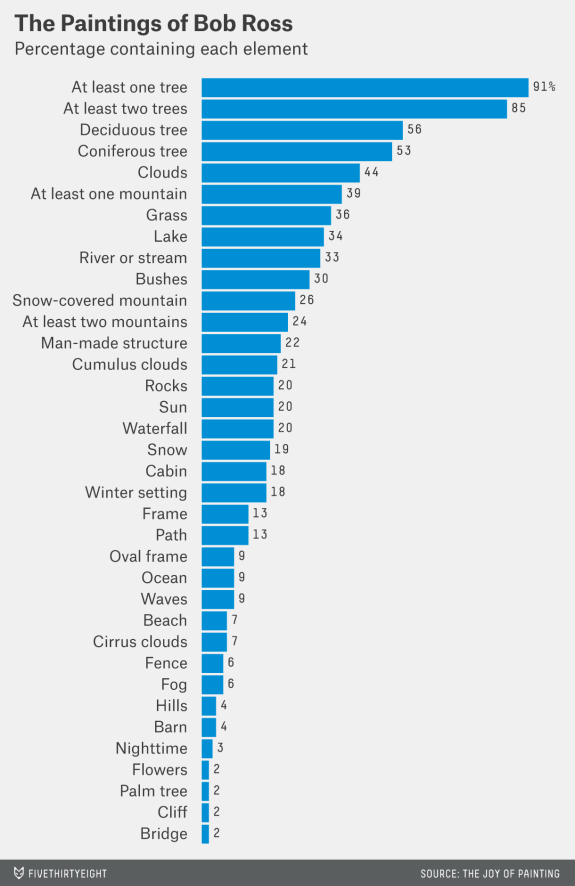

In [12]:
from IPython.display import Image
Image(filename = '/home/schmatthew/Documents/Code/DS-1/DS-Sprint-02-Storytelling-With-Data/module3-make-explanatory-visualizations/hickey-ross-tags-1.png', width=750, height=1400)

In [37]:
column_names = list(bob_ross)
column_names

['EPISODE',
 'TITLE',
 'APPLE_FRAME',
 'AURORA_BOREALIS',
 'BARN',
 'BEACH',
 'BOAT',
 'BRIDGE',
 'BUILDING',
 'BUSHES',
 'CABIN',
 'CACTUS',
 'CIRCLE_FRAME',
 'CIRRUS',
 'CLIFF',
 'CLOUDS',
 'CONIFER',
 'CUMULUS',
 'DECIDUOUS',
 'DIANE_ANDRE',
 'DOCK',
 'DOUBLE_OVAL_FRAME',
 'FARM',
 'FENCE',
 'FIRE',
 'FLORIDA_FRAME',
 'FLOWERS',
 'FOG',
 'FRAMED',
 'GRASS',
 'GUEST',
 'HALF_CIRCLE_FRAME',
 'HALF_OVAL_FRAME',
 'HILLS',
 'LAKE',
 'LAKES',
 'LIGHTHOUSE',
 'MILL',
 'MOON',
 'MOUNTAIN',
 'MOUNTAINS',
 'NIGHT',
 'OCEAN',
 'OVAL_FRAME',
 'PALM_TREES',
 'PATH',
 'PERSON',
 'PORTRAIT',
 'RECTANGLE_3D_FRAME',
 'RECTANGULAR_FRAME',
 'RIVER',
 'ROCKS',
 'SEASHELL_FRAME',
 'SNOW',
 'SNOWY_MOUNTAIN',
 'SPLIT_FRAME',
 'STEVE_ROSS',
 'STRUCTURE',
 'SUN',
 'TOMB_FRAME',
 'TREE',
 'TREES',
 'TRIPLE_FRAME',
 'WATERFALL',
 'WAVES',
 'WINDMILL',
 'WINDOW_FRAME',
 'WINTER',
 'WOOD_FRAMED']

In [43]:
names = (['TREE', 'TREES', 'DECIDUOUS', 'CONIFEROUS', 'CLOUDS', 'MOUNTAIN', 'GRASS', 'LAKE',  
          'BUSHES', 'RIVER', 'SNOWY_MOUNTAIN','MOUNTAINS', 'STRUCTURE', 'CUMULUS', 'ROCKS', 'SUN', 'WATERFALL', 'SNOW',
         'CABIN', 'WINTER', 'FRAMED','PATH', 'OVAL_FRAME',  'OCEAN', 'WAVES', 'BEACH', 'CIRRUS', 'FENCE', 'FOG',
          'HILLS', 'BARN', 'NIGHT', 'FLOWERS', 'PALM', 'CLIFF', 'BRIDGE'])
def concatDf(arr, df):
    subset = pd.DataFrame(index=index, columns=columns) #creating empty df
    for name in arr:
        for i in range(len(arr)):
            pd.concat([df[arr[i]], df[arr[i+1]] , axis=1, keys=[arr])  #function that interatively concats created
subset

SyntaxError: invalid syntax (<ipython-input-43-d67fdd90bfd3>, line 5)